## Preliminary Data Analysis

In [49]:
# All imports used throughout the notebook are found here.

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error
from sklearn.linear_model import LinearRegression


In [50]:
# Loading the data
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


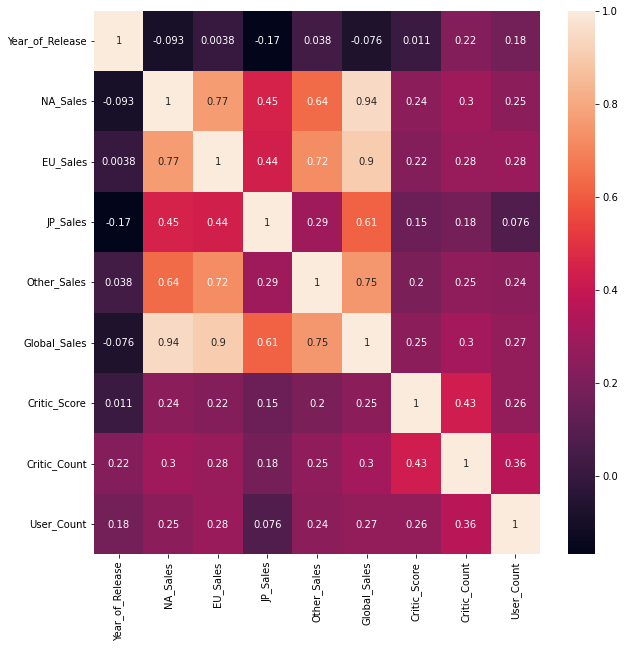

In [51]:
# A correlation matrix of the data after we dropped the column 'Name'
cm=df.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sn.heatmap(cm, annot=True)
plt.show()

In [52]:
# Dropping all NaN  and infinity values
print(df.shape)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna().drop('Name', axis='columns')


(16719, 16)


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_Sales'}>,
        <AxesSubplot:title={'center':'EU_Sales'}>],
       [<AxesSubplot:title={'center':'JP_Sales'}>,
        <AxesSubplot:title={'center':'Other_Sales'}>,
        <AxesSubplot:title={'center':'Global_Sales'}>],
       [<AxesSubplot:title={'center':'Critic_Score'}>,
        <AxesSubplot:title={'center':'Critic_Count'}>,
        <AxesSubplot:title={'center':'User_Count'}>]], dtype=object)

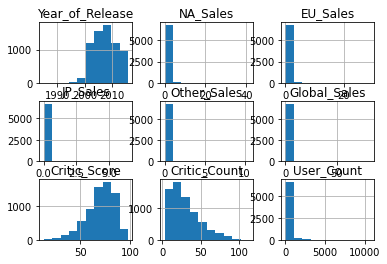

In [53]:
df.hist()

In [54]:
# Set the variable which we would like to predict
y = df['Global_Sales']
X = df.drop('Global_Sales',axis='columns') #for convinience

In [55]:
# Adding dummy variables for all categorical variables
X_dummies = pd.get_dummies(X, columns=['Platform', 'Genre', 'Publisher', 'Developer', 'Rating'], dtype=int)
print(X_dummies.shape)


(6825, 1596)


In [56]:
# Adding a constant term for the linear regression and splitting the data for training and testing
X_dummies['constant'] = [1]*X_dummies.shape[0] #for linear reg
Xtrain,Xtest,ytrain,ytest = train_test_split(X_dummies,y,random_state =0)

## Linear Regression

In [57]:
model = LinearRegression()
model.fit(Xtrain, ytrain)

yfit = model.predict(Xtest)

print('Explained variance score is: ', explained_variance_score(ytest, yfit))
print('Mean squared error is: ', mean_squared_error(ytest, yfit))

Explained variance score is:  0.9999883027468869
Mean squared error is:  4.306124666802486e-05


In [58]:
# Trianing a Ridge model and looking for the most suitable alpha parameter
ridge_model = Ridge()
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(
    ridge_model,
    grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1
)

results = search.fit(Xtrain, ytrain)
print(results.best_params_)


{'alpha': 0.55}


## Ridge Regression

In [59]:
# Ridge training with different alpha values
grid['alpha'] = 10.0**np.arange(0, 10)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(
    ridge_model,
    grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1
)

results = search.fit(Xtrain, ytrain)

print(results.best_params_)


{'alpha': 1.0}


In [60]:
# Running the ridge model with the first best alpha coefficient on the test data
updated_ridge_model = Ridge(alpha=0.55)
updated_ridge_model.fit(Xtrain, ytrain)

yfit = updated_ridge_model.predict(Xtest)

print('Explained variance score is: ', explained_variance_score(ytest, yfit))
print('Mean squared error is: ', mean_squared_error(ytest, yfit))

Explained variance score is:  0.9999887465464279
Mean squared error is:  4.142621270225985e-05


In [61]:
# Running the ridge model with the second best alpha coefficient on the test data
updated_ridge_model = Ridge(alpha=1)
updated_ridge_model.fit(Xtrain, ytrain)
yfit = updated_ridge_model.predict(Xtest)

print('Explained variance score is: ', explained_variance_score(ytest, yfit))
print('Mean squared error is: ', mean_squared_error(ytest, yfit))

Explained variance score is:  0.9999882890749792
Mean squared error is:  4.310609990180317e-05


## Lasso Regression

In [62]:
# Training the Lasso model on different values between 0 and 1
lasso_model = Lasso()
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(
    lasso_model,
    grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1
)

results = search.fit(Xtrain, ytrain)

print(results.best_params_)


C:\Users\bg0ttkv\.pyenv\pyenv-win\versions\3.7.9\lib\site-packages\sklearn\model_selection\_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\bg0ttkv\.pyenv\pyenv-win\versions\3.7.9\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


{'alpha': 0.0}


After seeing that the best suggestion for alpha is 0, we decided to run the code with very small alphas, in order to achieve feature selection without risking the accuracy of the model.

In [63]:
grid['alpha'] = 10.0**np.arange(-10, -7,1)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(
    lasso_model,
    grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1
)

results = search.fit(Xtrain, ytrain)


print(results.best_params_)

{'alpha': 1e-08}


In [64]:
coefficients = search.best_estimator_.coef_
importance = np.abs(coefficients)
print('Selected features for regression: ', np.array(X_dummies.columns)[importance > 0])
print('Coefficients of the features: ', search.best_estimator_.coef_)


Selected features for regression:  ['Year_of_Release' 'NA_Sales' 'EU_Sales' ... 'Rating_K-A' 'Rating_M'
 'Rating_T']
Coefficients of the features:  [-1.99757210e-05  1.00009389e+00  9.99794150e-01 ...  0.00000000e+00
  1.24069229e-04  0.00000000e+00]


In [66]:
# Slightly increasing alpha to achieve better feature selection.
updated_lasso_model = Lasso(alpha=1/1000)
updated_lasso_model.fit(Xtrain, ytrain)

print('Selected columns for regression', np.array(X_dummies.columns)[updated_lasso_model.coef_ > 0])
yfit = updated_lasso_model.predict(Xtest)
print('Explained variance score is: ', explained_variance_score(ytest, yfit))
print('Mean squared error is: ', mean_squared_error(ytest, yfit))


Selected columns for regression ['NA_Sales' 'EU_Sales' 'JP_Sales' 'Other_Sales' 'Critic_Score'
 'Critic_Count' 'User_Count']
Explained variance score is:  0.9999745188302167
Mean squared error is:  9.376087871087858e-05
